# Gapminder Data Analysis

# Introduction

### Dataset Description

For this project, we're going to be using data from the [gapminder project](https://www.gapminder.org/data/). Specifically, we'll be looking at relationships between GDP Per cápita and Education inequality. 

For this, we're going to use two different datasets: 
* GDP Per Cápita Adjusted for constant 2010 prices in $ [Dataset](https://www.gapminder.org/data/)
* Mean Years of education for men and women > 25 years old [Dataset men](https://www.gapminder.org/data/)[Dataset Women](https://www.gapminder.org/data/)

### Questions for analysis

We're going to be centering ourselves on the theme of Education Vs Income. 

For this, We'll be answeting the following questions: 

* How has the Distribution of income changed from 1986 to 2006?
* Has inequality in access to education got better in the 21 century?
* Is there a relatiionship between Education Inequality and Income?



In [139]:
#  Library importation and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('gdppercapita.csv', index_col = 'country')

# Data Wrangling

### GDP Per Capita Data
We'll be working with data from the years 1986 and 2016. We are working with this values, so that we can visualize the changes in the 40 years that have passed. 

In [140]:
# We select the years that we'll be using
gdp_86 = df['1986']
gdp_16 = df['2016']

# Drop the null values
gdp_86.dropna(inplace= True)
gdp_16.dropna(inplace = True)

gdp_86.head()

country
Aruba                   17.2k
Angola                   3230
Albania                  1800
Andorra                 29.2k
United Arab Emirates    62.4k
Name: 1986, dtype: object

We can see that there are rows that have some issues with the data format. We need to deal with the decimal dots '.' and the k that means the value has to be multiplied by 1000. We'll clean the data now:

In [141]:
# We define functions to reuse when wrangling the data.

def remove_k(df):
    # This function removes the k in the rows of the dataframe given
    df = df.apply(lambda x: x.replace('k', ''))
    df.to_frame()
    return df

def remove_thousands(df):
    # We remove the punctuation and turn the numbers in the correct format.
    df = df.apply(lambda x: int(x.replace('.', '')) * 100 if (len(x) == 4 and '.' in x) else (int(x)* 1000 if len(x) == 2 else x))
    df.to_frame().astype('int32')
    return df


In [142]:
# Now we pass the dataframes to our cleaning functions:

gdp_86 = remove_k(gdp_86)
gdp_86 = remove_thousands(gdp_86).to_frame().astype('int32')

gdp_16 = remove_k(gdp_16)
gdp_16 = remove_thousands(gdp_16).to_frame().astype('int32')


# To ensure that we got data from the same countries, let's perform a join
gdp = gdp_86.join(gdp_16, how='inner')

gdp.head()



,1986,2016
country,,
Aruba,17200,28800
Angola,3230,3920
Albania,1800,4090
Andorra,29200,37400
United Arab Emirates,62400,39400


### Mean years in School (Men VS. Women)

In [143]:
# First loading and data inspection
men_yr_09 = pd.read_csv('mean_years_men_25.csv', index_col=0, usecols=['country', '2009'])
women_yr_09 = pd.read_csv('mean_years_women_25.csv', index_col=0, usecols = ['country', '2009'])

men_yr_86 = pd.read_csv('mean_years_men_25.csv', index_col=0, usecols=['country', '1986'])
women_yr_86 = pd.read_csv('mean_years_women_25.csv', index_col=0, usecols = ['country', '1986'])

men_yr_09.head()

,2009
country,
Afghanistan,2.6
Angola,5.1
Albania,10.2
United Arab Emirates,9.5
Argentina,9.8


In [144]:
# Let's compare the data between 1986 and the most recent one for education, 2009
# We need to clean the data again for 2009
gdp_09 = df['2009'].dropna()

gdp_09 = remove_k(gdp_09)
gdp_09 = remove_thousands(gdp_09).to_frame().astype('int32')

gdp_09.head()

,2009
country,
Aruba,26900
Afghanistan,473
Angola,3960
Albania,3430
Andorra,35400


In [145]:
# Obtenemos todos nuestros datos para 2009
gdp_09.rename({'2009': 'gdp'}, axis = 1, inplace= True)
men_09 = men_yr_09.dropna()
men_09.rename({'2009' : 'year_men'}, axis = 1, inplace= True)
women_09 = women_yr_09.dropna().rename({'2009' : 'year_women'}, axis = 1)

women_09.head()

# Y 1986

gdp_86.rename({'1986': 'gdp'}, axis = 1, inplace= True)
men_86 = men_yr_86.dropna()
men_86.rename({'1986' : 'year_men'}, axis = 1, inplace= True)
women_86 = women_yr_86.dropna().rename({'1986' : 'year_women'}, axis = 1)



In [146]:
# JUntamos todos los datos en un solo DataFrame
final_09 = gdp_09.join(men_09, how = 'inner').join(women_09, how = 'inner')

# Calculamos nuestro indicador para el año 2009
final_09['indicator'] = final_09['year_men'] / final_09['year_women']
final_09.head()

# Tambien los datos de 2016
final_86 = gdp_86.join(men_86, how = 'inner').join(women_86, how = 'inner')

# Calculamos nuestro indicador para el año 2016
final_86['indicator'] = final_86['year_men'] / final_86['year_women']
final_86.head()

,gdp,year_men,year_women,indicator
country,,,,
Angola,3230,2.7,1.0,2.700000
Albania,1800,7.2,5.9,1.220339
United Arab Emirates,62400,5.4,3.6,1.500000
Argentina,9410,7.6,7.4,1.027027
Antigua and Barbuda,9890,9.2,9.4,0.978723


# Exploratory Data Analysis

Let's take a look at our data to see how it looks like after cleaning

### GDP per capita

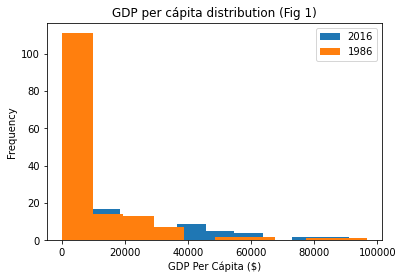

In [147]:
gdp['2016'].plot(kind = 'hist', label = '2016')
gdp['1986'].plot(kind = 'hist', label = '1986')
plt.legend()
plt.xlabel('GDP Per Cápita ($)')
plt.title('GDP per cápita distribution (Fig 1)');



We can see that the distribution as a whole moved to the right. This makes sense, as the world as a whole has experienced continued advances and progress in economic matters in this 4 decades. Let's eliminate some of the outliers (> 100.000 $) so that we can see a more detailed graph.

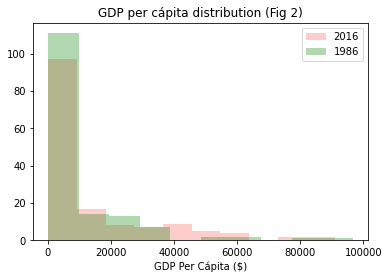

In [148]:
plt.hist(x=gdp[gdp['2016'] <= 100000]['2016'], alpha = 0.2, label= '2016', color = 'red');
plt.hist(x=gdp[gdp['1986'] <= 100000]['1986'], alpha = 0.3, label= '1986', color = 'green');
plt.legend();
plt.xlabel('GDP Per Cápita ($)')
plt.title('GDP per cápita distribution (Fig 2)');


We can see on the histogram, that the most significant change has been made on the lower side of the spectrum. This means that since 1986, almost 20 countries have moved from the <= 10000$ of gdp percapita to the medium income zone. We can also see, that the median and mean of the distribution has moved significantly to the right. We'll check that now:

In [149]:
print("The median GDP per capita in 1986 was: {} $".format(gdp['1986'].median()))
print("The median GDP per capita in 1986 was: {} $".format(gdp['2016'].median()))
print("The mean GDP per capita in 1986 was: {} $".format(gdp['1986'].mean()))
print("The mean GDP per capita in 2016 was: {} $".format(gdp['2016'].mean()))

The median GDP per capita in 1986 was: 2910.0 $
The median GDP per capita in 1986 was: 4810.0 $
The mean GDP per capita in 1986 was: 9810.569536423842 $
The mean GDP per capita in 2016 was: 13776.19867549669 $


With this we can see that the average GDP per capita was 9810 dollars in 1986, but the median was 2910 dollars, meaning that a most of the countries were to the left of the mean. We can also see that the median GDP per capita has almost doubled since 1986. 

### Education Years

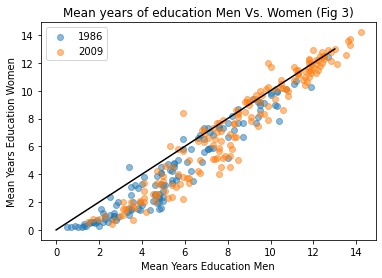

In [150]:
plt.scatter(x = final_86['year_men'], y = final_86['year_women'], alpha = 0.5, label = '1986')
plt.scatter(x = final_09['year_men'], y = final_09['year_women'], alpha = 0.5, label = '2009')
plt.xlabel('Mean Years Education Men')
plt.ylabel('Mean Years Education Women')
plt.title('Mean years of education Men Vs. Women (Fig 3)')
plt.legend();
x = np.linspace(0,13)
plt.plot(x, x, color = 'black');

We can observe how the distribution is clearly skewed to the men. Each dot under the line represents a country in which the men have a higher mean years of education than women. Other fact that stands out from the graph is that we can see a clear relationship between years in education and equality. The more years spent in education, the more equal the access seems to be for men and women.


Let's see if this is related to Economic development. We created an indicator based on this data. We'll divide the mean years of education in men by the mean years of education for women. 

* i > 1 -> Men had more years of education than women
* i = 1 -> Equality
* i < 1 -> Women had more years of education than men

### Education years VS. GDP

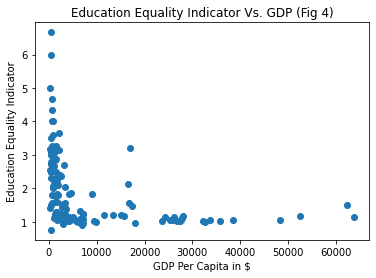

In [151]:
plt.scatter(x = final_86['gdp'], y = final_86['indicator'])
plt.xlabel('GDP Per Capita in $')
plt.ylabel('Education Equality Indicator')
plt.title('Education Equality Indicator Vs. GDP (Fig 4)');


We can see that there's a huge dispersion on our indicator for low income countries and also, how, generally speaking the inequality in education years drops with higher income. 

In [152]:
final_09.dtypes

gdp             int32
year_men      float64
year_women    float64
indicator     float64
dtype: object

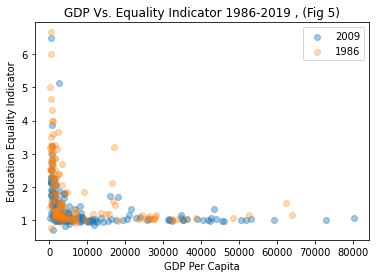

In [153]:
plt.scatter(x = final_09['gdp'], y = final_09['indicator'], alpha = 0.4, label = '2009')
plt.scatter(x = final_86['gdp'], y = final_86['indicator'], alpha = 0.3, label = '1986')
plt.xlabel('GDP Per Capita')
plt.ylabel('Education Equality Indicator')
plt.legend();
plt.title('GDP Vs. Equality Indicator 1986-2019 , (Fig 5)');


We can see that the distribution has changed to the right and to the bottom. Two factors affect here, the GDP has generally risen and the inequality in education in the low income countris has severally decreased in the late years. 

# Conclusions

### 

### How has the Distribution of income changed from 1986 to 2006?

In the EDA (Fig 1 and Fig 2), we could see how the distribution of income in the world has steered to the right (higher GDP per cápita), two movements stand out: 
* Movement towards median earning countries. This can be explained due to development of countries such as China, Easter Europe etc.
* Main change has been in the low percentiles. Almost 20 countries have left the lowest income terrain and moved to higher earning status.

Even though this seems positive, it remains an issue that 50% of the world still has a lower GDP per cápitan than 5490$ and the distribution is hugely skewed to the right. 


### Has inequality in access to education got better in the 21 century?

As we can see in our analysis (Fig 3), situation has gotten better, but not because what it may appear. We can see how the data points have moved towards to top right corner. This means that, in average, people are staying longer years in education than before. We can see a clear correlation also, between average years in education and equality in access to it. All of this can be summed up in: 

* Developed countries are leading the way in inequality reduction: We can see a far greater reduction in inequality in the countries with more years in average in education, which later we confirmed in our GDP Vs. our education equality indicator (Fig 5).

* Undeveloped countries have performed better but the improvement is small and needs a bump. We see a decrease in extreme values in Education inequality Indicator, but little movement towards the upper part of out scatter plot which would mean greater strives for equality (Fig 3).


### Is there a relatiionship between Education Inequality and Income?

We can see there's a clear relationship between income measured by GDP per cápita and education inequality expressed by our Education Equality Indicator. (Fig 5). The relationship does not seem linear at first, but this may be due to the extreme amount of values concentrated in the lower percentile for GDP Per Cápita. 

Also, we can appreciate a really quick descent in education inequality once the countries start to move towards higher income, having almost 90% of the countries that have > 10.000$ in GDP really near to a value of 1 in the indicator.

### Limitations

I wanted to link this data to Extreme poverty percentages and analyse the situation with those three variables. But the data in the gapminder project was extremely scarce and wasn't enough to perform a complete analysis. It would have reduce the number of countries that were part of this analysis to a minimum, since the data from the World Bank (from where the gapminder data is taken) is really partitioned, a few countries report this data, and the ones that do report it, do it seldom and there are huge gaps in the data. 